# 12장 다중 분류 문제 해결하기

[<img src="https://raw.githubusercontent.com/taehojo/taehojo.github.io/master/assets/images/linktocolab.png" align="left"/> ](https://colab.research.google.com/github/taehojo/deeplearning/blob/master/colab/ch12-colab.ipynb)

### 2. 상관도 그래프

In [1]:
import pandas as pd

# 깃허브에 준비된 데이터를 가져옵니다.
!git clone https://github.com/taehojo/data.git

# 아이리스 데이터를 불러옵니다.
df = pd.read_csv('./data/iris3.csv')

In [2]:
# 첫 5줄을 봅니다.
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


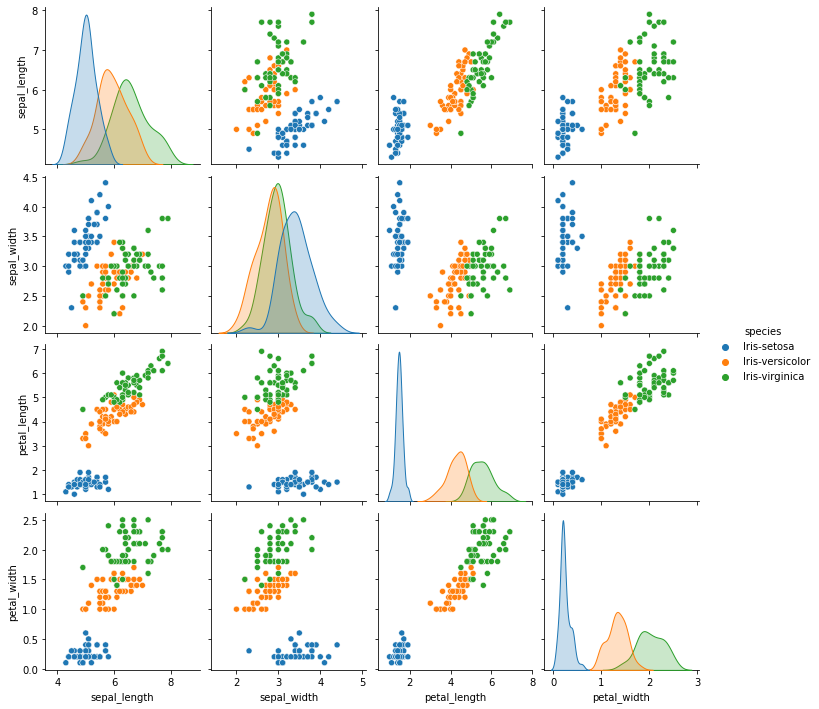

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# 그래프로 확인해 봅시다.
sns.pairplot(df, hue='species');
plt.show()

## 3. 원-핫 인코딩

In [4]:
# 속성을 X, 클래스를 y로 저장합니다.
X = df.iloc[:,0:4]
y = df.iloc[:,4]

# X와 y의 첫 5줄을 출력해 보겠습니다. 
print(X[0:5])
print(y[0:5])

   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: species, dtype: object


In [5]:
# 원-핫 인코딩 처리를 합니다.
y = pd.get_dummies(y)

# 원-핫 인코딩 결과를 확인합니다.
print(y[0:5])

   Iris-setosa  Iris-versicolor  Iris-virginica
0            1                0               0
1            1                0               0
2            1                0               0
3            1                0               0
4            1                0               0


## 4. 소프트맥스

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 모델 설정
model = Sequential()
model.add(Dense(12,  input_dim=4, activation='relu'))
model.add(Dense(8,  activation='relu'))
model.add(Dense(3, activation='softmax'))
model.summary()

# 모델 컴파일
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 실행
history=model.fit(X, y, epochs=30, batch_size=5)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 12)                60        
_________________________________________________________________
dense_16 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_17 (Dense)             (None, 3)                 27        
Total params: 191
Trainable params: 191
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
30/30 [==============================] - 0s 2ms/step - loss: 1.9954 - accuracy: 0.3333
Epoch 2/30
30/30 [==============================] - 0s 2ms/step - loss: 1.4589 - accuracy: 0.3333
Epoch 3/30
30/30 [==============================] - 0s 2ms/step - loss: 1.2054 - accuracy: 0.3333
Epoch 4/30
30/30 [==============================] - 0s 2ms/step - loss: 1.0958 - accuracy: 0

## 5. 아이리스 품족 예측 실행

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 깃허브에 준비된 데이터를 가져옵니다. 앞에서 이미 가져왔으므로 주석 처리합니다. 5번 예제만 별도 실행 시 주석을 해제한 후 실행해주세요.
# !git clone https://github.com/taehojo/data.git

# 아이리스 데이터를 불러옵니다.
df = pd.read_csv('./data/iris3.csv')

# 속성을 X, 클래스를 y로 저장합니다.
X = df.iloc[:,0:4]
y = df.iloc[:,4]

# 원-핫 인코딩 처리를 합니다.
y = pd.get_dummies(y)

# 모델 설정
model = Sequential()
model.add(Dense(12,  input_dim=4, activation='relu'))
model.add(Dense(8,  activation='relu'))
model.add(Dense(3, activation='softmax'))
model.summary()

# 모델 컴파일
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 실행
history=model.fit(X, y, epochs=30, batch_size=5)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 12)                60        
_________________________________________________________________
dense_13 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_14 (Dense)             (None, 3)                 27        
Total params: 191
Trainable params: 191
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
30/30 [==============================] - 0s 2ms/step - loss: 1.4888 - accuracy: 0.3333
Epoch 2/30
30/30 [==============================] - 0s 2ms/step - loss: 1.0854 - accuracy: 0.4067
Epoch 3/30
30/30 [==============================] - 0s 2ms/step - loss: 0.9764 - accuracy: 0.6000
Epoch 4/30
30/30 [==============================] - 0s 2ms/step - loss: 0.9382 - accuracy: 0